In [75]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
images_path = '/content/drive/My Drive/Colab Notebooks/capt-the-pic/dataset/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [78]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [79]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [80]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    images_features[img_name] = pred
    
    count += 1
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [81]:
caption_path = '/content/drive/My Drive/Colab Notebooks/capt-the-pic/dataset/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [82]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [83]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

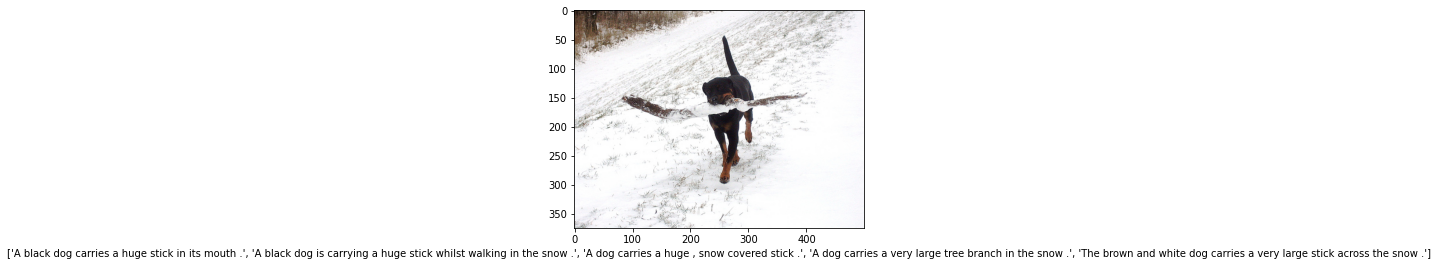

In [84]:
import matplotlib.pyplot as plt

for i in range(2):
    plt.figure()
    img_name = images[i]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

386655611_1329495f97.jpg
dict_keys(['386655611_1329495f97.jpg', '390986651_c801db91a0.jpg', '3726590391_bc6e729bb6.jpg', '3738685861_8dfff28760.jpg', '390671130_09fdccd52f.jpg', '386160015_d4b31df68e.jpg', '403678611_73978faed7.jpg', '3745451546_fc8ec70cbd.jpg', '394563330_68b566368c.jpg', '374103842_17873ce505.jpg', '401476986_73918145a3.jpg', '381275595_b429fd1639.jpg', '397725001_e51f7c391c.jpg', '394136487_4fc531b33a.jpg', '3747543364_bf5b548527.jpg', '3738789925_7d17dbdf25.jpg', '395461421_c586b136de.jpg', '400851260_5911898657.jpg', '399246804_b4b5dc70e1.jpg', '3737539561_d1dc161040.jpg', '396179143_e1511336e1.jpg', '3758175529_81941e7cc9.jpg', '3726019124_f302b3d48a.jpg', '3726130458_07df79e969.jpg', '391020801_aaaae1e42b.jpg', '396763804_3b7f1e12a8.jpg', '380537190_11d6c0a412.jpg', '378453580_21d688748e.jpg', '380527679_574749123d.jpg', '380590140_25b9889772.jpg', '3751594676_edfbfa0688.jpg', '377872672_d499aae449.jpg', '397286183_745abbf40d.jpg', '3736786640_70df13be2c.jpg', '

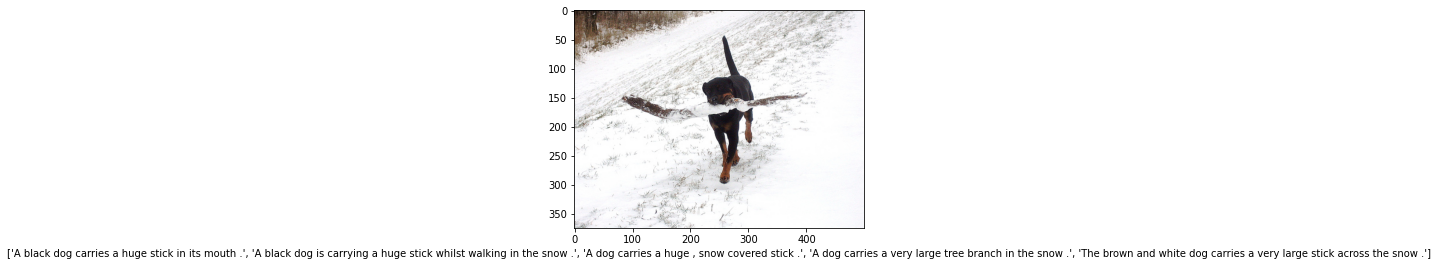

In [85]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    print(k)
    print(images_features.keys())
    plt.figure()
    
    img_name = '/content/drive/My Drive/Colab Notebooks/capt-the-pic/dataset/flickr8k-sau/Flickr_Data/Images/' + k
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:
print(images_features)

{'386655611_1329495f97.jpg': array([1.0705705 , 0.43842775, 0.01929784, ..., 0.89008206, 0.7266642 ,
       0.2787691 ], dtype=float32), '390986651_c801db91a0.jpg': array([0.5926873 , 0.83639014, 0.21244867, ..., 0.47601318, 0.60341525,
       0.        ], dtype=float32), '3726590391_bc6e729bb6.jpg': array([0.13348514, 2.8274312 , 0.03405401, ..., 0.        , 0.02456107,
       0.37164485], dtype=float32), '3738685861_8dfff28760.jpg': array([0.6728398 , 0.77674896, 0.08089317, ..., 0.0125946 , 0.00163605,
       0.13566178], dtype=float32), '390671130_09fdccd52f.jpg': array([0.5488937 , 0.27754012, 0.09178712, ..., 0.04531911, 0.11624537,
       0.1509864 ], dtype=float32), '386160015_d4b31df68e.jpg': array([0.19791588, 0.63084054, 0.13904084, ..., 0.14035073, 0.28435633,
       0.16065717], dtype=float32), '403678611_73978faed7.jpg': array([0.18572342, 0.44031554, 0.04420398, ..., 2.1978426 , 0.5383878 ,
       0.18472423], dtype=float32), '3745451546_fc8ec70cbd.jpg': array([2.179175 

In [ ]:
print(captions_dict)

{'3511062827_cd87871c67.jpg': ['A black dog pulling on a purple object with its mouth .', 'A black dog pulls on something .', 'A dog bites purple fabric .', 'A dog playing with a purple toy .', 'The black dog is pulling on something purple with its mouth .'], '3512033659_7e8a0c2ffa.jpg': ['A crowd of Hindu women in headwraps .', 'A group of woman wearing scarves on their heads crowd together next to a building .', 'A street is filled with Indian people in a market .', 'Many individuals with coverings on their heads crowded together .', 'The crowds are huge as the citizens await the opening .'], '3512033861_a357bb58b6.jpg': ['A crowd of foreigners stand .', 'A crowd of people surrounding a woman in white wearing sunglasses .', 'A group of men surround a woman in a headscarf .', 'a very large group of people standing crowded together outside .', 'Many people have gathered in the street .'], '3513265399_a32e8cfd18.jpg': ['A baseball player slides home in a non professional baseball game i

In [86]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [87]:
for k,v in captions_dict.items():
    print(k)
    print(v)
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

3511062827_cd87871c67.jpg
['A black dog pulling on a purple object with its mouth .', 'A black dog pulls on something .', 'A dog bites purple fabric .', 'A dog playing with a purple toy .', 'The black dog is pulling on something purple with its mouth .']
3512033659_7e8a0c2ffa.jpg
['A crowd of Hindu women in headwraps .', 'A group of woman wearing scarves on their heads crowd together next to a building .', 'A street is filled with Indian people in a market .', 'Many individuals with coverings on their heads crowded together .', 'The crowds are huge as the citizens await the opening .']
3512033861_a357bb58b6.jpg
['A crowd of foreigners stand .', 'A crowd of people surrounding a woman in white wearing sunglasses .', 'A group of men surround a woman in a headscarf .', 'a very large group of people standing crowded together outside .', 'Many people have gathered in the street .']
3513265399_a32e8cfd18.jpg
['A baseball player slides home in a non professional baseball game in an HDR photogr

In [ ]:
print(captions_dict)

{'3511062827_cd87871c67.jpg': ['startofseq a black dog pulling on a purple object with its mouth . endofseq', 'startofseq a black dog pulls on something . endofseq', 'startofseq a dog bites purple fabric . endofseq', 'startofseq a dog playing with a purple toy . endofseq', 'startofseq the black dog is pulling on something purple with its mouth . endofseq'], '3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512033861_a357bb58b6.jpg': ['startofseq a crowd of foreigners stand . endofseq', 'startofseq a crowd of people surrounding a woman in white wearing sunglasses . endofseq', 'startofseq a group of m

In [88]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = 0
            else:
                count_words[word] += 1

In [89]:
len(count_words)

3979

In [90]:
print(count_words)

{'startofseq': 7499, 'a': 11791, 'black': 716, 'dog': 1579, 'pulling': 17, 'on': 2045, 'purple': 55, 'object': 28, 'with': 1503, 'its': 190, 'mouth': 191, '.': 6773, 'endofseq': 7499, 'pulls': 7, 'something': 58, 'bites': 7, 'fabric': 1, 'playing': 406, 'toy': 112, 'the': 3419, 'is': 1705, 'crowd': 67, 'of': 1208, 'hindu': 0, 'women': 106, 'in': 3572, 'headwraps': 0, 'group': 219, 'woman': 642, 'wearing': 520, 'scarves': 5, 'their': 122, 'heads': 8, 'together': 80, 'next': 157, 'to': 632, 'building': 85, 'street': 205, 'filled': 9, 'indian': 8, 'people': 525, 'market': 14, 'many': 28, 'individuals': 4, 'coverings': 1, 'crowded': 15, 'crowds': 0, 'are': 647, 'huge': 23, 'as': 180, 'citizens': 0, 'await': 0, 'opening': 2, 'foreigners': 0, 'stand': 97, 'surrounding': 4, 'white': 676, 'sunglasses': 41, 'men': 190, 'surround': 1, 'headscarf': 4, 'very': 42, 'large': 220, 'standing': 357, 'outside': 164, 'have': 6, 'gathered': 7, 'baseball': 73, 'player': 54, 'slides': 18, 'home': 7, 'non': 

In [91]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    print(k)
    print(count_words[k])
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

Streaming output truncated to the last 5000 lines.
kimono
0
stop
8
empty
12
traditional
3
cup
7
naval
0
regalia
0
though
5
bearing
4
open-mouthed
0
splashes
15
trunk
5
mossy
1
schoolgirls
0
peeking
0
shoveling
1
melted
0
shovel
5
melting
1
shovels
0
coats
2
sticking
8
nose
18
fur
6
put
3
school
4
foot
8
staircase
3
peoople
0
congregate
0
retrieving
2
horses
27
multi-colored
2
sweater
18
blocking
2
suns
0
rays
1
outlined
0
falls
10
silhouette
7
desk
3
signing
0
paperwork
2
filling
2
signs
9
forms
0
bend
1
gymnastics
0
deeper
0
swimsuits
6
seashore
2
wade
0
shows
6
flexibility
0
crossing
19
hard
2
enough
1
herself
2
vertical
0
completely
0
yelling
0
embrace
8
celebrate
1
song
1
asleep
5
library
3
listening
5
headphones
6
sleeps
3
student
0
populated
0
most
2
sleeping
15
bank
2
bushes
10
brush
9
turning
1
turns
5
speed
1
rafts
0
drive
1
watercraft
0
coming
14
crash
0
buy
0
gear
23
wrestler
11
ropes
5
wrestlers
4
referee
3
backgroud
1
jetty
2
great
1
mid-flight
0
swooping
0
downwards
0
gre

In [ ]:
len(new_dict)

3979

In [92]:
print(new_dict)

{'startofseq': 1, 'a': 2, 'black': 3, 'dog': 4, 'pulling': 5, 'on': 6, 'purple': 7, 'object': 8, 'with': 9, 'its': 10, 'mouth': 11, '.': 12, 'endofseq': 13, 'pulls': 14, 'something': 15, 'bites': 16, 'fabric': 17, 'playing': 18, 'toy': 19, 'the': 20, 'is': 21, 'crowd': 22, 'of': 23, 'hindu': 24, 'women': 25, 'in': 26, 'headwraps': 27, 'group': 28, 'woman': 29, 'wearing': 30, 'scarves': 31, 'their': 32, 'heads': 33, 'together': 34, 'next': 35, 'to': 36, 'building': 37, 'street': 38, 'filled': 39, 'indian': 40, 'people': 41, 'market': 42, 'many': 43, 'individuals': 44, 'coverings': 45, 'crowded': 46, 'crowds': 47, 'are': 48, 'huge': 49, 'as': 50, 'citizens': 51, 'await': 52, 'opening': 53, 'foreigners': 54, 'stand': 55, 'surrounding': 56, 'white': 57, 'sunglasses': 58, 'men': 59, 'surround': 60, 'headscarf': 61, 'very': 62, 'large': 63, 'standing': 64, 'outside': 65, 'have': 66, 'gathered': 67, 'baseball': 68, 'player': 69, 'slides': 70, 'home': 71, 'non': 72, 'professional': 73, 'game':

In [93]:
new_dict['<OUT>'] = len(new_dict)

In [ ]:
len(new_dict)

3980

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
print(captions_backup)

{'3511062827_cd87871c67.jpg': ['startofseq a black dog pulling on a purple object with its mouth . endofseq', 'startofseq a black dog pulls on something . endofseq', 'startofseq a dog bites purple fabric . endofseq', 'startofseq a dog playing with a purple toy . endofseq', 'startofseq the black dog is pulling on something purple with its mouth . endofseq'], '3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512033861_a357bb58b6.jpg': ['startofseq a crowd of foreigners stand . endofseq', 'startofseq a crowd of people surrounding a woman in white wearing sunglasses . endofseq', 'startofseq a group of m

In [ ]:
print(captions_dict)

{'3511062827_cd87871c67.jpg': ['startofseq a black dog pulling on a purple object with its mouth . endofseq', 'startofseq a black dog pulls on something . endofseq', 'startofseq a dog bites purple fabric . endofseq', 'startofseq a dog playing with a purple toy . endofseq', 'startofseq the black dog is pulling on something purple with its mouth . endofseq'], '3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512033861_a357bb58b6.jpg': ['startofseq a crowd of foreigners stand . endofseq', 'startofseq a crowd of people surrounding a woman in white wearing sunglasses . endofseq', 'startofseq a group of m

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
print(captions_dict)

{'3511062827_cd87871c67.jpg': ['startofseq a black dog pulling on a purple object with its mouth . endofseq', 'startofseq a black dog pulls on something . endofseq', 'startofseq a dog bites purple fabric . endofseq', 'startofseq a dog playing with a purple toy . endofseq', 'startofseq the black dog is pulling on something purple with its mouth . endofseq'], '3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512033861_a357bb58b6.jpg': ['startofseq a crowd of foreigners stand . endofseq', 'startofseq a crowd of people surrounding a woman in white wearing sunglasses . endofseq', 'startofseq a group of m

In [ ]:
print(captions_backup)

{'3511062827_cd87871c67.jpg': ['startofseq a black dog pulling on a purple object with its mouth . endofseq', 'startofseq a black dog pulls on something . endofseq', 'startofseq a dog bites purple fabric . endofseq', 'startofseq a dog playing with a purple toy . endofseq', 'startofseq the black dog is pulling on something purple with its mouth . endofseq'], '3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512033861_a357bb58b6.jpg': ['startofseq a crowd of foreigners stand . endofseq', 'startofseq a crowd of people surrounding a woman in white wearing sunglasses . endofseq', 'startofseq a group of m

In [94]:
for k, vv in captions_dict.items():
    for v in vv:
        print(vv.index(v))
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])
        captions_dict[k][vv.index(v)] = encoded

Streaming output truncated to the last 5000 lines.
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4

In [98]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [101]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 2, 7, 8, 9, 10, 11, 12, 13]
[1, 2, 28, 23, 29, 30, 31, 6, 32, 33, 22, 34, 35, 36, 2, 37, 12, 13]
[1, 2, 87, 21, 79, 80, 71, 88, 20, 89, 90, 20, 81, 26, 2, 91, 74, 12, 13]
[1, 2, 68, 69, 26, 57, 94, 95, 20, 96, 50, 20, 69, 26, 97, 21, 84, 36, 98, 12, 13]
[1, 2, 114, 92, 36, 107, 2, 96, 88, 2, 87, 92, 36, 115, 20, 111, 26, 2, 116, 74, 12, 13]
[1, 2, 68, 69, 26, 2, 149, 218, 82, 57, 219, 21, 167, 20, 105, 110, 2, 129, 96, 220, 221, 41, 222, 6, 12, 13]
[1, 2, 129, 4, 9, 2, 97, 303, 21, 26, 2, 158, 142, 82, 304, 36, 107, 2, 129, 82, 299, 19, 26, 10, 11, 12, 13]
[1, 2, 28, 23, 258, 539, 48, 64, 26, 2, 540, 6, 541, 537, 542, 543, 6, 20, 147, 233, 9, 32, 495, 26, 20, 173, 12, 13]
[1, 2, 174, 30, 3, 870, 869, 82, 57, 870, 429, 82, 2, 174, 26, 57, 870, 869, 82, 57, 870, 429, 48, 871, 26, 20, 872, 12, 13]
[1, 1123, 21, 2, 623, 23, 221, 258, 59, 142, 214, 26, 1150, 9, 237, 6, 2, 171, 142, 82, 23, 2, 258, 589, 30, 2, 57, 276, 12, 13]
[1, 2, 174, 214, 26, 299, 412, 2, 849, 88, 64,

In [102]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [103]:
X, y_in, y_out = generator(images_features, captions_dict)

In [104]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [105]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [106]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))
image_model.summary()

language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))
language_model.summary()
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 34, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 128)           509440    
_________________________________________________________________
lstm (LSTM)                  (None, 34, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 34, 128)           32896     
Total params: 936,576
Traina

In [108]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 31s 165ms/step - loss: 4.5076 - accuracy: 0.2216
Epoch 2/50
189/189 [==============================] - 31s 166ms/step - loss: 4.2654 - accuracy: 0.2566
Epoch 3/50
189/189 [==============================] - 31s 166ms/step - loss: 4.1250 - accuracy: 0.2669
Epoch 4/50
189/189 [==============================] - 31s 166ms/step - loss: 4.0009 - accuracy: 0.2813
Epoch 5/50
189/189 [==============================] - 31s 166ms/step - loss: 3.8034 - accuracy: 0.3088
Epoch 6/50
189/189 [==============================] - 31s 166ms/step - loss: 3.6114 - accuracy: 0.3262
Epoch 7/50
189/189 [==============================] - 31s 166ms/step - loss: 3.4481 - accuracy: 0.3431
Epoch 8/50
189/189 [==============================] - 31s 166ms/step - loss: 3.3140 - accuracy: 0.3569
Epoch 9/50
189/189 [==============================] - 31s 166ms/step - loss: 3.1924 - accuracy: 0.3712
Epoch 10/50
189/189 [==============================] - 31s 166ms/step - l

In [109]:
inv_dict = {v:k for k, v in new_dict.items()}

In [110]:
model.save('/content/drive/My Drive/Colab Notebooks/capt-the-pic/model.h5')

In [111]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/capt-the-pic/mine_model_weights.h5')

In [112]:
np.save('/content/drive/My Drive/Colab Notebooks/capt-the-pic/vocab.npy', new_dict)

In [115]:
def getImage(x):
    test_img_path = images[x]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (224,224))
    test_img = np.reshape(test_img, (1,224,224,3))
    return test_img

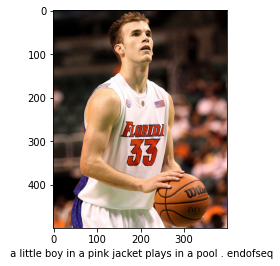

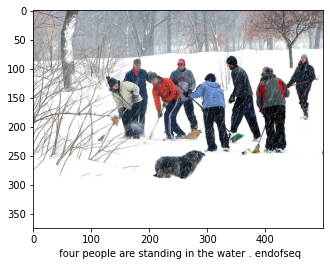

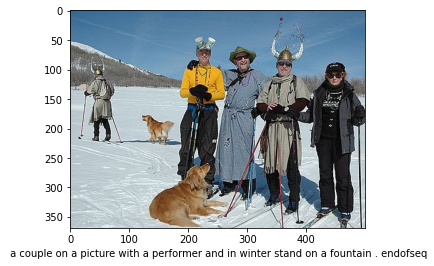

In [117]:
for i in range(5):
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    text_inp = ['startofseq']
    count = 0
    caption = ''
    while count < 25:
        count += 1
        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]
        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
        prediction = np.argmax(model.predict([test_feature, encoded]))
        sampled_word = inv_dict[prediction]
        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break
        text_inp.append(sampled_word)   
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

In [118]:
from keras.applications import ResNet50
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
resnet.save('/content/drive/My Drive/Colab Notebooks/capt-the-pic/resnet.h5')

94773248/94765736 [==============================] - 2s 0us/step
